# Overview of seaborn plotting functions

## Similar functions for similar tasks

seaborn 네임 스페이스* 는 수평적입니다. 모든 기능은 최상위 수준에서 액세스할 수 있습니다.   
그러나 코드 자체는 서로 다른 수단을 통해 유사한 시각화 목표를 달성하는 **함수 모듈**로 계층 구조로 구성되어 있습니다.   
대부분의 문서는 이러한 **모듈을 중심**으로 구성되어 있습니다.  
"관계형(relational)", "분산형(distributional)" 및 "범주형(categorical)"과 같은 이름을 접하게 될 것입니다.   
   
     ex. distributions 모듈 - 데이터의 분포를 나타내는 데 특화된 함수 정의. 히스토그램과 같은 방법 포함
   
- - - 
네임 스페이스* 관련 참고 : https://hcnoh.github.io/2019-01-30-python-namespace


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

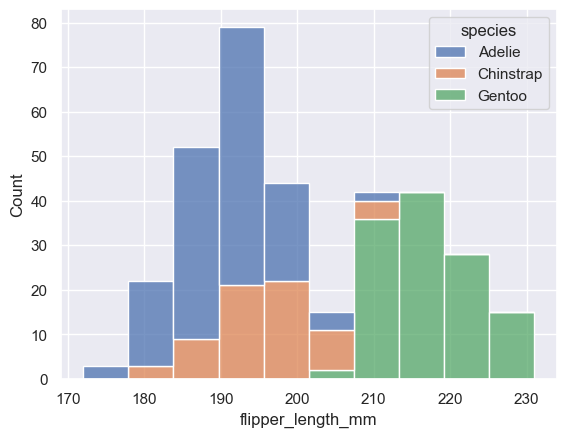

In [2]:
penguins = sns.load_dataset("penguins")

# 히스토그램
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack") # multiple : layer(default), dodge, stack, fill

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

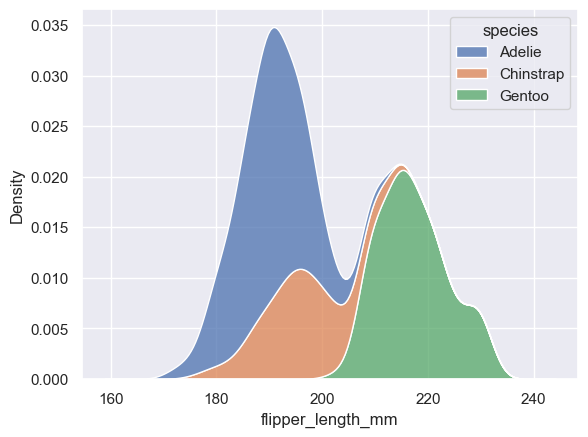

In [3]:
# kde 플롯
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

모듈 내의 함수는 많은 **기본 코드 공유**하고 **유사한 기능(예: 위 예제의 multiple="stack") 제공**   
표현 방법 별 장단점이 다르기 때문에 다양한 표현 간 전환이 용이하도록 이렇게 설계됨

## Figure-level vs. axes-level functions

seaborn : axes-level 과 figure-level 로 분류
   
* axes-level : 함수의 반환 값인 단일 matplotlib.pyplot.Axes 객체에 데이터 표현 (ex. 위의 두 플롯)
* figure-level : 그림을 관리하는 Seaborn(주로 FacetGrid) 객체로 matplotlib과 상호작용

모듈별로 axes-level 기능을 제공하는 figure-level 기능이 있음(그림 참고)
![nn](../img/function_overview_8_0.png)

예시> displot()
- distributions 모듈의 figure-level 함수   
- 기본 동작 : histplot()과 동일한 코드를 사용하여 히스토그램 표현

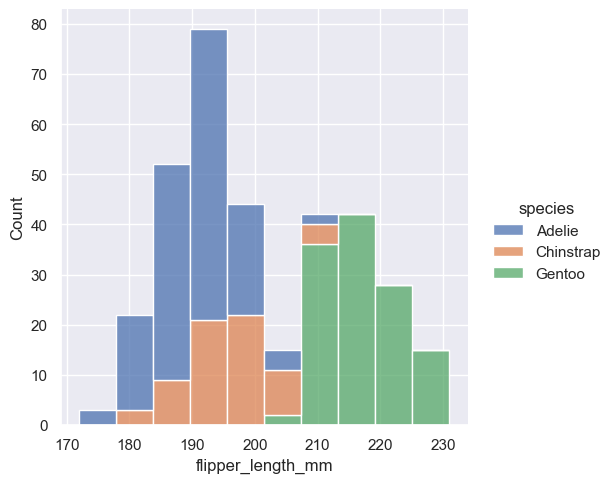

In [4]:
# figure-level 함수로 axes-level 함수와 같은 플롯 그리기 (histogram)
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

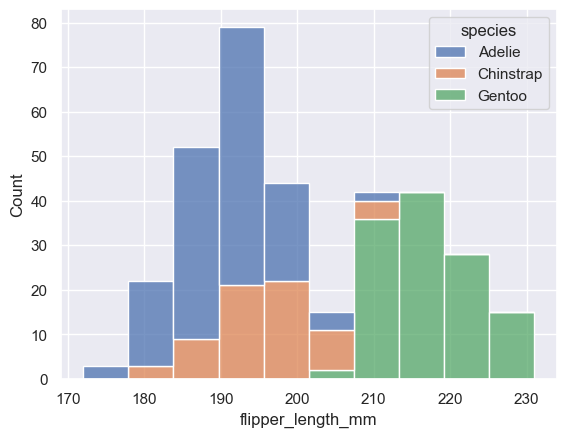

In [5]:
# axes-level (histogram)
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

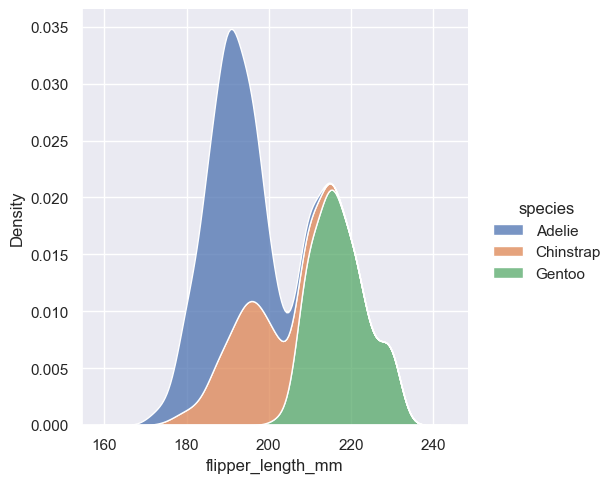

In [6]:
# figure-level 함수로 axes-level 함수와 같은 플롯 그리기 (kde)
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

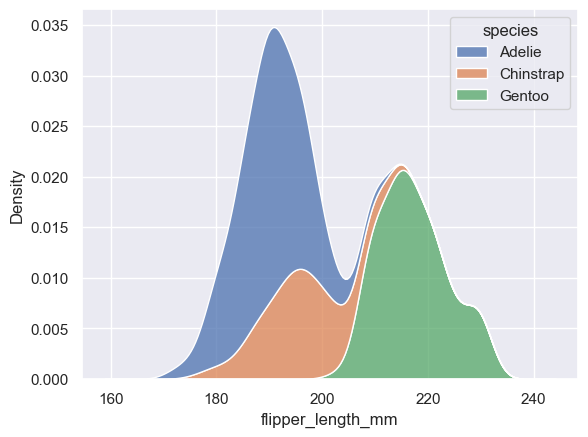

In [7]:
# axes-level (kde)
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

**차이점**
   
* 범례 : (FL)플롯 외부, (AL) 플롯 내부에 배치
   
**Figure-level의 유용성**
   
* 서브플롯 생성이 간단함 : 예 - 종별 분포 서브플롯 작성

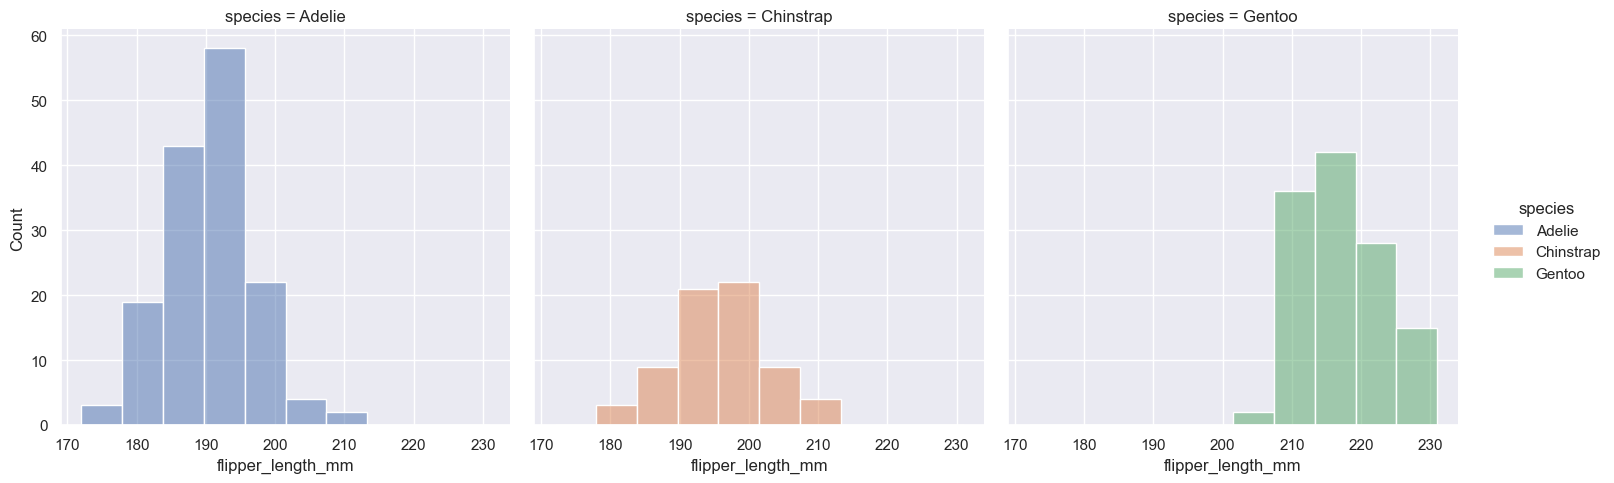

In [8]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

**figure-level 함수로 axes-level 함수를 사용할 때의 단점**

* 독스트링 검색이 어려움

### Axes-level functions make self-contained plots

* Axes-level 함수는 matplotlib 처럼 작성   
* 축 레이블, 범례 자동 추가 (그외 항목 수정 X)
* matplotlob과 함께 구성 가능

Axes-level 함수는 내부적으로 matplotlib.pyplot.gca()를 호출하여 matplotlib 인터페이스에 연결하여 "현재 활성" 축에 플롯을 그림    
'ax=' 인수가 허용되어 플롯 위치를 정확히 지정할 수 있음

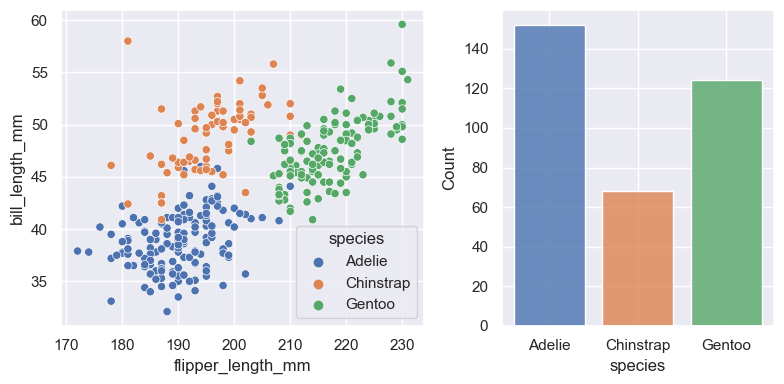

In [9]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3])) # row, col, figsize …
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

### Figure-level functions own their figure

Figure-level 함수는 다른 플롯과 (쉽게) 구성할 수 없음    
설계상 초기화를 포함해 자체 그림을 "소유"하므로 Figure-level 함수를 사용하여 기존 축에 플롯을 그리는 개념이 없음    
이 제약을 통해 Figure-level 함수는 범례를 플롯 외부에 배치하는 것과 같은 기능 구현

하지만, 반환하는 객체의 matplotlib 축에 액세스하고 플롯에 다른 요소를 추가하여 Figure-level 함수가 제공하는 것 이상을 수행하는 것도 가능

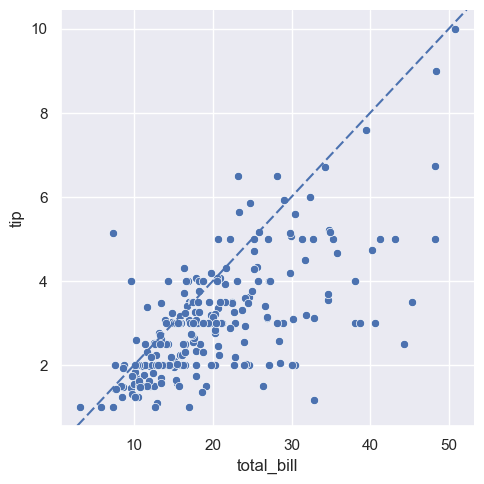

In [10]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

### Customizing plots from a figure-level function

* Figure-level 함수는 FacetGrid 인스턴스 반환    

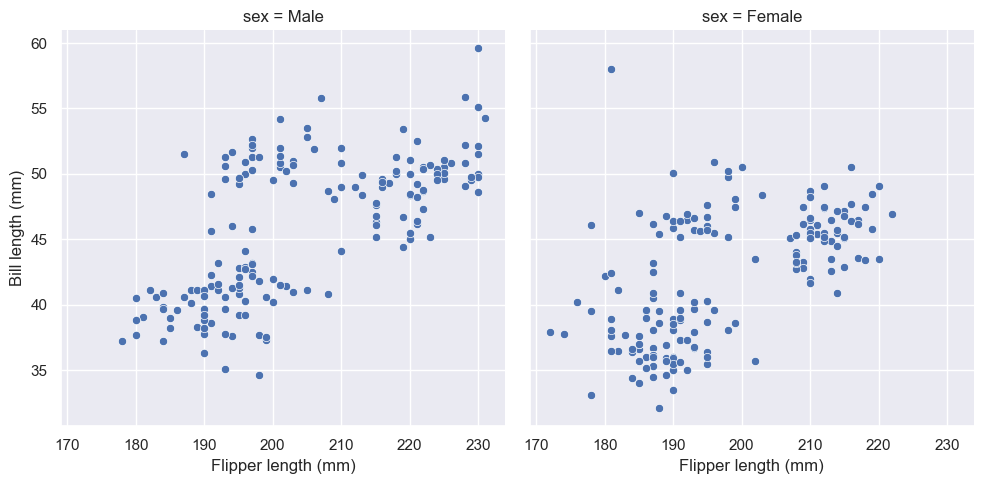

In [11]:
# 서브플롯의 속성을 사용자 정의하는 방법 예시
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

* 이 방법은 matplotlib API 가 아님
* Figure-level 함수 사용시에만 가능

### Specifying figure sizes
   
**matplotlib 플롯 크기 설정 방법**
1. 플롯을 설정하는 동안 global rcParams에서 전체 그림의 너비와 높이 설정(예: matplotlib.pyplot.subplots()의 figsize 파라미터 사용)
2. Figure 객체에서 메서드 호출(예: matplotlib.Figure.set_size_inches())
   
seaborn Axes-level 함수도 동일한 규칙이 적용 됨   
플롯의 크기는 플롯이 속한 그림의 크기와 해당 그림의 축 레이아웃에 따라 결정

**figure-level 함수를 사용시 차이점**
1. 함수 자체에 그림 크기 제어 파라미터 존재(실제로는 그림을 관리하는 기본 FacetGrid의 파라미터임)
2. seaborn의 너비(aspect), 높이(height) 파라미터는 matplotlib의 폭(width), 높이(height) 파라미터와 약간 다르게 작용
    (seaborn 파라미터는 폭(width) = 높이(height) * 너비(aspect)로 정의함)
    
⚠️ 파라미터가 전체 그림의 크기가 아니라 각 서브플롯의 크기에 해당   

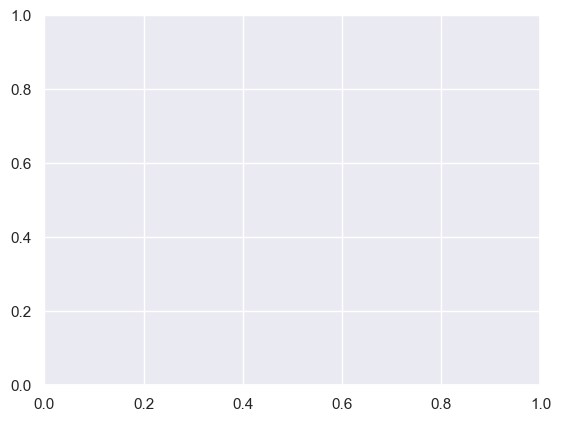

In [20]:
# 하나의 서브플롯이 있는 matplotlib.pyplot.subplots()의 기본 출력
f, ax = plt.subplots()

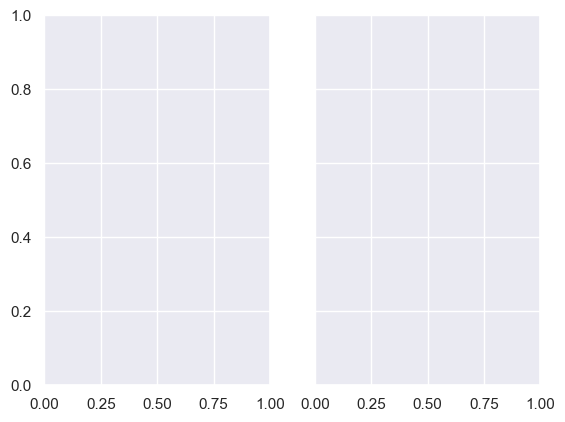

In [21]:
# 열이 여러 개인 그림, 전체 크기가 같지만 축은 공간에 맞게 가로로 압축됨
f, ax = plt.subplots(1, 2, sharey=True)

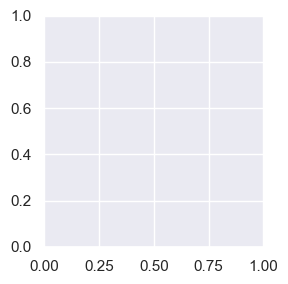

In [33]:
# Figure 수준 함수로 만든 플롯은 정사각형 형태로 출력
# FacetGrid를 직접 사용하여 빈 플롯 설정(replot(), displot() 또는 catplot()과 같은 함수 뒤에서 생성)
g = sns.FacetGrid(penguins)

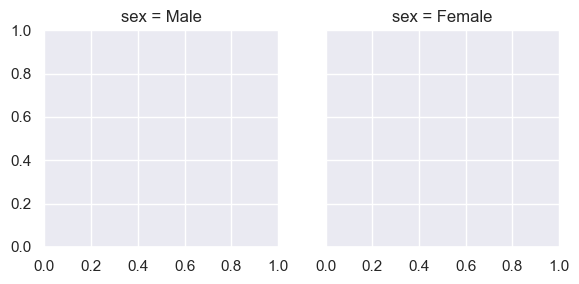

In [24]:
# 열 추가시 그림 자체가 넓어져 서브플롯과 크기와 모양이 같아짐
g = sns.FacetGrid(penguins, col="sex")

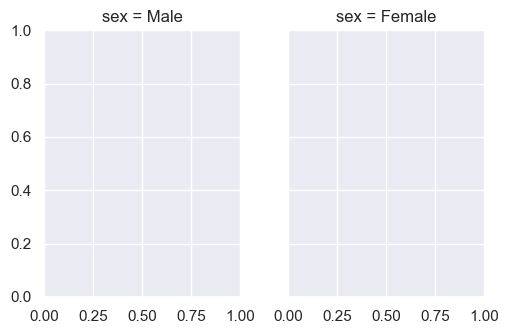

In [25]:
# 그림의 총 행과 열 수를 고려하지 않고 각 서브플롯의 크기와 모양 조정 가능
g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=.75)

Facet 변수할당으로 전체그림 크기를 간단히 조정할 수 있지만, 그림 크기 변경시 matplotlib과 작동방식이 약간 다르다는 점을 기억할 것

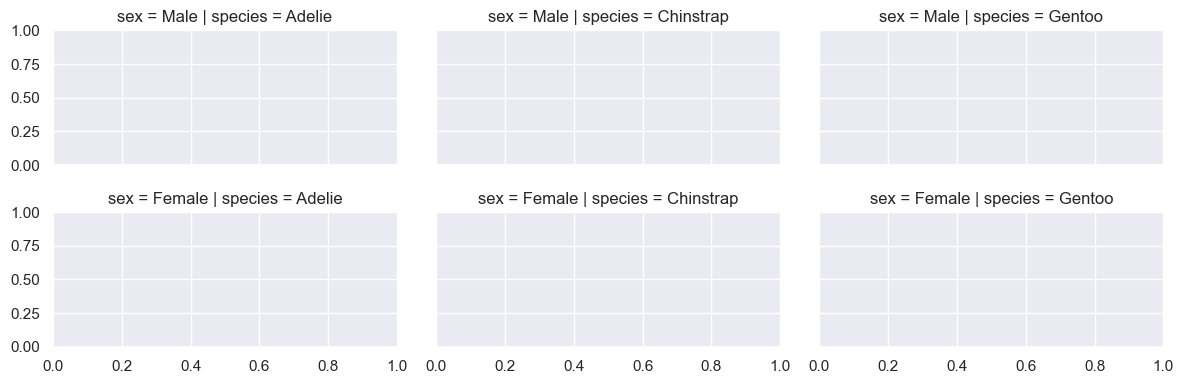

In [37]:
# 테스트
g = sns.FacetGrid(penguins, col = 'species', row = 'sex', height = 2, aspect = 2)

### Relative merits of figure-level functions

요약 :   
   
장점
- 데이터 변수에 의한 손쉬운 패싯
- 기본적인 범례의 위치 : 플롯 외부
- 손쉬운 피규어 레벨 커스터마이징
- 다양한 그림 크기 매개변수화?

단점
- 많은 매개변수를 함수 signature로 확인이 어려움
- 더 큰 matplotlib 그림의 일부가 될 수 없습니다.?
- matplotlib와 다른 API
- 다양한 그림 크기 매개변수화🤔?
   
전반적으로,    
figure-level 기능은 초보에게 약간 더 복잡하지만 고유한 추가 기능 제공, 튜토리얼은 대체로 figure-level 함수 사용, 사용 권장👍   
예외 : 여러가지 다른 종류의 플롯으로 구성된 복잡한 플롯 작성시에는 matplotlib으로 직접 figure 설정 & axes-level 함수 사용 -> 개별 구성 요소 설정 추천

## Combining multiple views on the data

위 분류 체계에 맞지 않는 `jointplot()` 와 `pairplot()`은 서로 다른 모듈에서 여러 종류의 플롯을 사용해 단일 그림에서 데이터 세트의 여러 측면을 표현     
   
두 플롯 모두 figure-level 함수이며 기본적으로 여러 서브플롯이 있는 그림을 만듦    
그러나, 그림을 관리하기 위해 각각 JointGrid와 PairGrid라는 서로 다른 개체를 사용

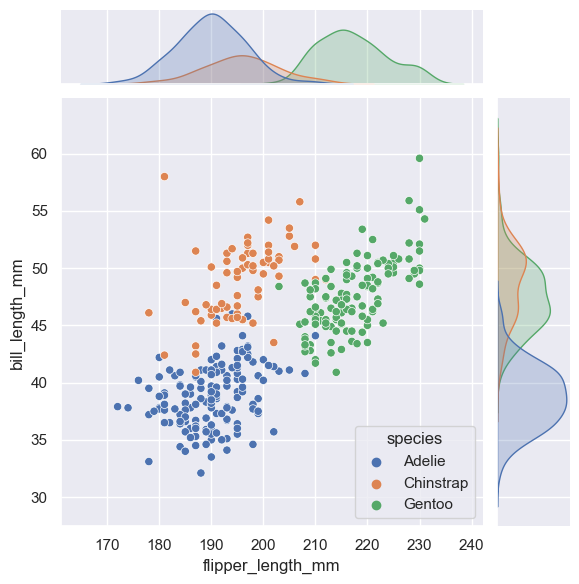

In [38]:
# jointplot() : 각 변수의 단변량 분포를 개별적으로 보여주는 주변 축을 추가하면서 두 변수의 관계 또는 공동 분포 표현
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

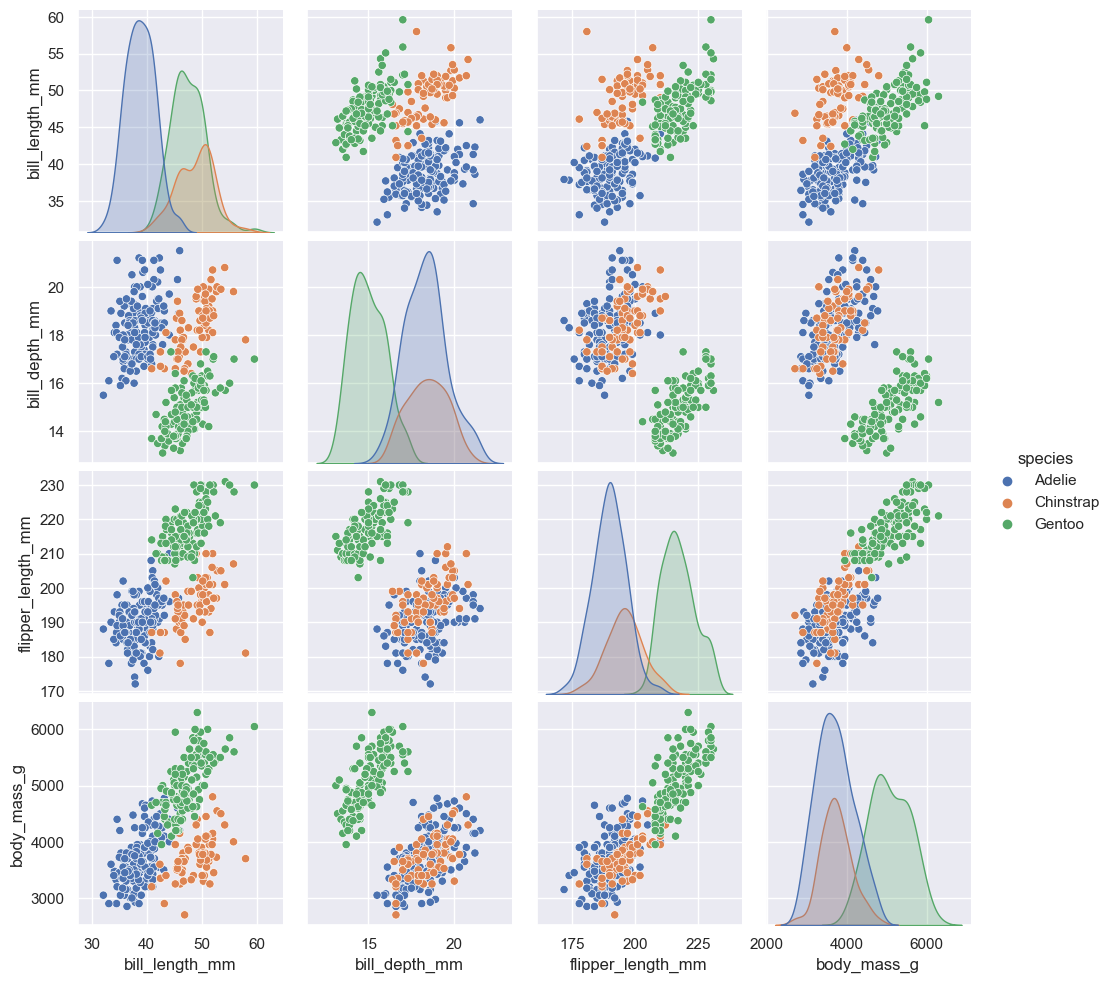

In [39]:
# pairplot() :  joint view,  marginal view 결합, 단일 관계에 초점을 맞추기보다는 변수의 모든 쌍별(pairwise) 조합을 동시에 시각화
sns.pairplot(data=penguins, hue="species")

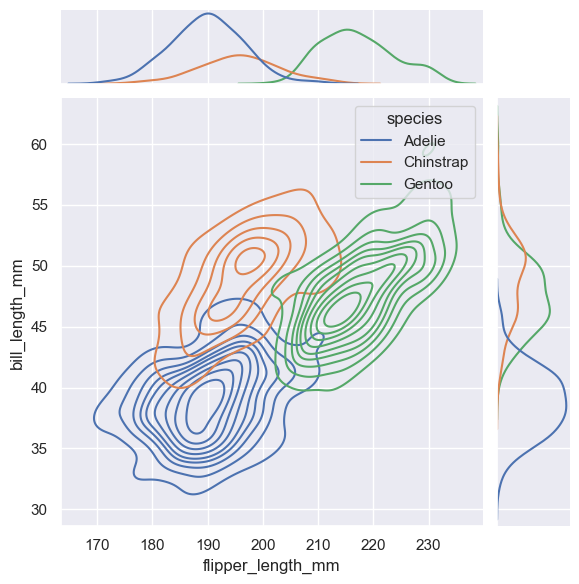

In [47]:
# 내부에서는 axes-level 함수(scatterplot() 및 kdeplot())를 사용 중이며 다른 형태로 교체할 수 있는 kind 파라미터도 사용 가능)
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="kde")